In [5]:
import pandas as pd
import statsmodels.api as sm

In [6]:
alex = pd.read_csv("/kaggle/input/alex-prices-2017-2024/alex_prices_2017_2024.csv", index_col=0)

In [7]:
alex["Date"] = pd.PeriodIndex(alex["Date"], freq="Q").to_timestamp()
alex2 = alex.set_index("Date")

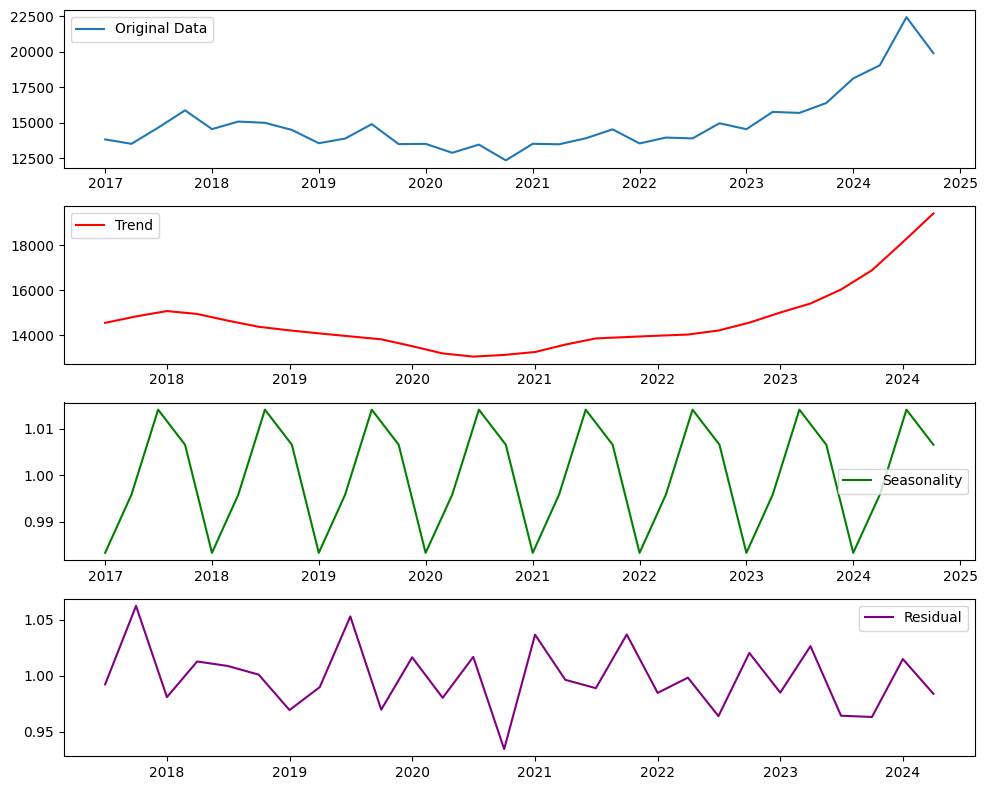

In [8]:
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(alex2["Price Per Meter"], model='mul', period=4)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(alex2["Price Per Meter"], label="Original Data")
plt.legend()

plt.subplot(412)
plt.plot(trend, label="Trend", color="red")
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(414)
plt.plot(residual, label="Residual", color="purple")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
usd = pd.read_csv("/kaggle/input/usd-prices/usd.csv")
usd = usd[["$ to egp", 'Date']]
usd["Date"] = pd.to_datetime(usd["Date"].str.replace("\\", "/"))
usd["Date"] = pd.to_datetime(usd["Date"])
usd["Date"] = usd["Date"].dt.to_period("Q")
usd = usd.rename(columns={"$ to egp": "usd"})

In [10]:
alex["Date"] = pd.to_datetime(alex["Date"])
alex["Date"] = alex["Date"].dt.to_period("Q")

In [11]:
alex = alex[["Price Per Meter", "Points", "Date"]]

In [12]:
alex_usd = pd.merge(alex, usd, on="Date", how="left")

In [13]:
alex_usd["adjusted"] = alex_usd["Price Per Meter"] / alex_usd["Points"] * alex_usd["usd"]
alex_usd["Date"] = pd.PeriodIndex(alex_usd["Date"], freq="Q").to_timestamp()
alex_adj = alex_usd[["Date", "adjusted"]].set_index("Date")

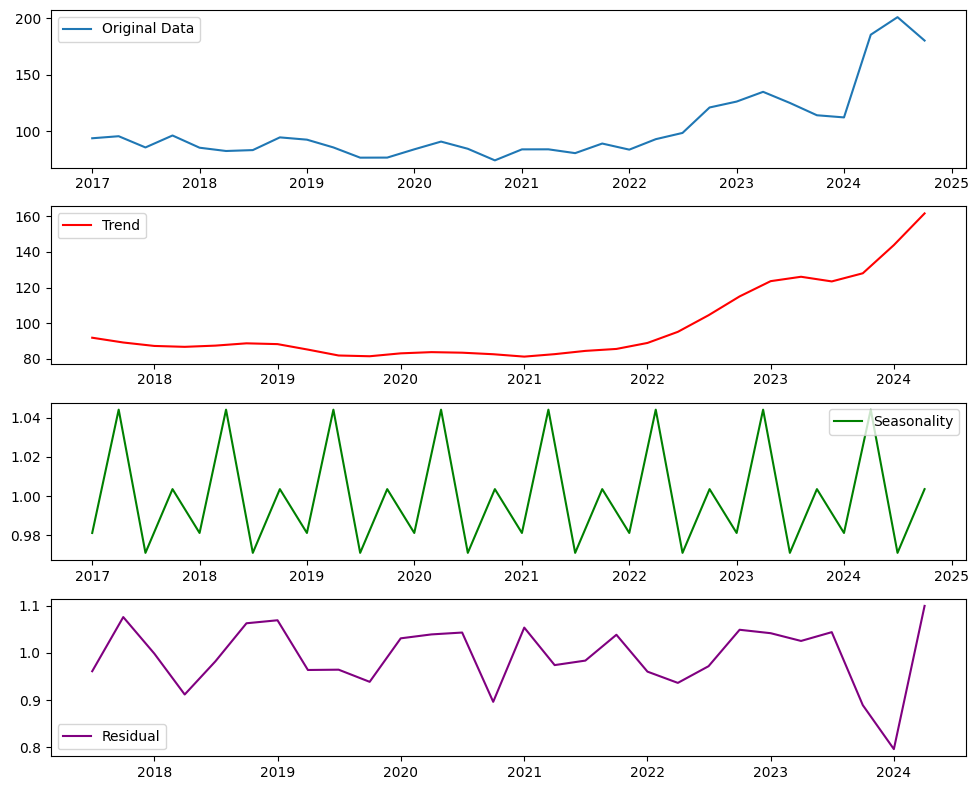

In [14]:
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(alex_adj["adjusted"], model='mul', period=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(alex_adj["adjusted"], label="Original Data")
plt.legend()

plt.subplot(412)
plt.plot(trend, label="Trend", color="red")
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(414)
plt.plot(residual, label="Residual", color="purple")
plt.legend()

plt.tight_layout()
plt.show()